### Coarse Tip Clearance Test Objective


### Procedure
- Initiate sweep from 30-100% throttle in increments of 5%, holding each throttle for 2 seconds.
- At each throttle step, allow ~0.5s for transient behaviour to settle and then average over the remaining data (~250 samples) to produce a single DC measurement for thrust, power, rpm, etc. at each point in the sweep.
- Repeat experiment at least once for each aerodynamic configuration, disassembling and reassembling between tests to ensure repeatability.

### Coarse Tip Clearance Test Configurations
| Duct Inner Diameter   | Propeller Diameter | Static Tip Clearance | Clearance to Height Ratio (%) |
|-                      |-                   |-                     |-                              |
| 137 mm                | 5 in / 127 mm      | 5 mm                 | 71.4 %                        |
| 133 mm                | 5 in / 127 mm      | 3 mm                 | 42.9 %                        |
| 129 mm                | 5 in / 127 mm      | 1 mm                 | 14.3 %                        |

### Hypothesis
- As tip clearance decreases, we expect thrust to electrical power efficiency (kgf/W) to increase.
- We expect all three 3D printed ducts to consume more power and produce less thrust relative to an equivalent propeller in open air. This is because the tip clearance to blade height ratio is too high for the duct to prevent the formation of blade tip vortices. These vortices are trapped by the duct rather than diffusing into open air, resulting in additional power loss.  

In [1]:
from runner import test_run, TestPlan, TestStep
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Specify Test Plan
Initialize a test plan object which sweeps from 0 to 100% throttle in increments of 5%, holding at each step for 2 seconds

In [2]:
# 1. Create a test plan consisting of steps.
step_duration_ms = 2_000
step_range = np.arange(5, 101, 5)

steps = [
    TestStep(bottom_throttle=i, top_throttle=i, duration_ms=step_duration_ms)
    for i in step_range
]
plan = TestPlan("test", steps=steps)

plan

TestPlan(name='test', steps=[TestStep(duration_ms=2000, top_throttle=5, bottom_throttle=5, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=10, bottom_throttle=10, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=15, bottom_throttle=15, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=20, bottom_throttle=20, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=25, bottom_throttle=25, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=35, bottom_throttle=35, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=40, bottom_throttle=40, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=45, bottom_throttle=45, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=50, bottom_throttle=50, pitch_ang

In [3]:
print(plan)

TestPlan(name='test', steps=[TestStep(duration_ms=2000, top_throttle=5, bottom_throttle=5, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=10, bottom_throttle=10, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=15, bottom_throttle=15, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=20, bottom_throttle=20, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=25, bottom_throttle=25, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=35, bottom_throttle=35, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=40, bottom_throttle=40, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=45, bottom_throttle=45, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=50, bottom_throttle=50, pitch_ang

### Execute Tests

In [4]:
# Initialize short thrust test to validate propeller mounting direction after changing props
test_duration_ms = 2000
mount_test_throttle = 10
perform_mounting_test = True

mount_test_plan = TestPlan("test", steps=[TestStep(bottom_throttle=mount_test_throttle, top_throttle=mount_test_throttle, duration_ms=test_duration_ms)])

In [5]:
### Execute optional mounting test
if (perform_mounting_test):
    try:
        test_run(filename=None, plan=mount_test_plan)
    except Exception as e:
        print(e)

could not open port 'COM9': FileNotFoundError(2, 'The system cannot find the file specified.', None, 2)


In [6]:
test_directory = Path("../test_data/fine_tip_clearance/")

In [7]:
data_dict = {}

# data_dict["1mm Coarse Tip Clearance - Lead Acid Battery"] = test_run(
#     filename=test_directory / "test_5in_6blade_1mm_pb_0.csv", plan=plan
# )
# data_dict["test_5in_6blade_1mm_pb_1"] = test_run(
#     filename=test_directory / "test_5in_6blade_1mm_pb_1.csv", plan=plan
# )
# data_dict["1mm Coarse Tip Clearance - 4S LiPo Battery"] = test_run(
#     filename=test_directory / "test_5in_6blade_1000um_1.csv", plan=plan
# )
# data_dict["test_5in_6blade_1000um_1"] = test_run(
#     filename=test_directory / "test_5in_6blade_1000um_1.csv", plan=plan
# )
# data_dict["test_5in_6blade_1mm_fine"] = test_run(
#     filename=test_directory / "test_5in_6blade_1mm_fine.csv", plan=plan
# )
# data_dict["1mm Fine Tip Clearance - Binding"] = test_run(
#     filename=test_directory / "test_5in_6blade_1mm_fine_pb.csv", plan=plan
# )
# data_dict["test_5in_6blade_0_5mm_fine_pb"] = test_run(
#     filename=test_directory / "test_5in_6blade_0_5mm_fine_pb.csv", plan=plan
# )
# data_dict["test_5in_6blade_1500um_0"] = test_run(
#     filename=test_directory / "test_5in_6blade_1500um_0.csv", plan=plan
# )
# data_dict["test_5in_6blade_1500um_1"] = test_run(
#     filename=test_directory / "test_5in_6blade_1500um_1.csv", plan=plan
# )
# data_dict["test_5in_6blade_3000um_0"] = test_run(
#     filename=test_directory / "test_5in_6blade_3000um_0.csv", plan=plan
# )
# data_dict["test_5in_6blade_3000um_1"] = test_run(
#     filename=test_directory / "test_5in_6blade_3000um_1.csv", plan=plan
# )
# data_dict["test_5in_6blade_open_air_recal_0"] = test_run(
#     filename="../test_data/open_air/test_5in_6blade_open_air_recal_0.csv", plan=plan
# )
# data_dict["test_5in_6blade_open_air_recal_1"] = test_run(
#     filename="../test_data/open_air/test_5in_6blade_open_air_recal_1.csv", plan=plan
# )
# data_dict["test_5in_6blade_open_air_shaved_0"] = test_run(
#     filename="../test_data/open_air/test_5in_6blade_open_air_shaved_0.csv", plan=plan
# )
# data_dict["test_5in_6blade_open_air_shaved_1"] = test_run(
#     filename="../test_data/open_air/test_5in_6blade_open_air_shaved_1.csv", plan=plan
# )
# data_dict["test_5in_6blade_open_air_shaved_low_soc"] = test_run(
#     filename="../test_data/open_air/test_5in_6blade_open_air_shaved_low_soc.csv", plan=plan
# )
data_dict["1mm Fine Tip Clearance - Lead Acid Battery"] = test_run(
    filename=test_directory / "test_1mm_pb_0.csv", plan=plan
)
data_dict["1mm Fine Tip Clearance 1 - Lead Acid Battery"] = test_run(
    filename=test_directory / "test_1mm_pb_1.csv", plan=plan
)
data_dict["0.9mm Fine Tip Clearance 0 - Lead Acid Battery"] = test_run(
    filename=test_directory / "test_0_9mm_pb_0.csv", plan=plan
)
data_dict["0.8mm Fine Tip Clearance 0 - Lead Acid Battery"] = test_run(
    filename=test_directory / "test_0_8mm_pb_0.csv", plan=plan
)
data_dict["0.7mm Fine Tip Clearance 0 - Lead Acid Battery"] = test_run(
    filename=test_directory / "test_0_7mm_pb_0.csv", plan=plan
)
data_dict["0.6mm Fine Tip Clearance 0 - Lead Acid Battery"] = test_run(
    filename=test_directory / "test_0_6mm_pb_0.csv", plan=plan
)
data_dict["0.5mm Fine Tip Clearance 0 - Lead Acid Battery"] = test_run(
    filename=test_directory / "test_0_5mm_pb_0.csv", plan=plan
)
data_dict["0.5mm Fine Tip Clearance 1 - Half-Discharged Lead Acid Battery"] = test_run(
    filename=test_directory / "test_0_5mm_pb_1.csv", plan=plan
)
data_dict["0.5mm Fine Tip Clearance 2 - Lead Acid Battery"] = test_run(
    filename=test_directory / "test_0_5mm_pb_2.csv", plan=plan
)
data_dict["0.4mm Fine Tip Clearance 0 - Lead Acid Battery"] = test_run(
    filename=test_directory / "test_0_4mm_pb_0.csv", plan=plan
)
# After 0.4 mm, noticed possible pulverized white dust just outside of travel of prop
# data_dict["0.3mm Fine Tip Clearance 0 - Lead Acid Battery"] = test_run(
#     filename=test_directory / "test_0_3mm_pb_0.csv", plan=plan
# )
# Prop started sticking to top duct on mounting before mounting 0.3 mm for the first time.

Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data


### Data Analysis

In [8]:
# Aggregate test data
df_all = pd.concat(data_dict, names=["test_name"])
df_all

top_motor_rpm  \
test_name                                      time_ms                    
1mm Fine Tip Clearance - Lead Acid Battery     0.488                0.0   
                                               5.166                0.0   
                                               9.179                0.0   
                                               13.157               0.0   
                                               17.179               0.0   
...                                                                 ...   
0.4mm Fine Tip Clearance 0 - Lead Acid Battery 41965.161         1228.0   
                                               41969.169         1200.0   
                                               41973.161         1157.0   
                                               41977.169         1100.0   
                                               41981.155         1085.0   

                                                          bottom_motor_rpm  \
test_name                                      time_ms                       
1mm Fine Tip Clearance - Lead Acid Battery     0.488                   0.0   
                                               5.166                   0.0   
                                               9.179                   0.0   
                                               13.157                  0.0   
                                               17.179                  0.0   
...                                                                    ...   
0.4mm Fine Tip Clearance 0 - Lead Acid Battery 41965.161            1228.0   
                                               41969.169            1142.0   
                                               41973.161            1157.0   
                                               41977.169            1114.0   
                                               41981.155            1085.0   

                                                          batt_voltage_V  \
test_name                                      time_ms                     
1mm Fine Tip Clearance - Lead Acid Battery     0.488              14.469   
                                               5.166              13.860   
                                               9.179              13.650   
                                               13.157             13.566   
                                               17.179             13.503   
...                                                                  ...   
0.4mm Fine Tip Clearance 0 - Lead Acid Battery 41965.161          11.991   
                                               41969.169          11.991   
                                               41973.161          12.033   
                                               41977.169          12.033   
                                               41981.155          12.054   

                                                          batt_current_A  \
test_name                                      time_ms                     
1mm Fine Tip Clearance - Lead Acid Battery     0.488               10.24   
                                               5.166               10.24   
                                               9.179               10.24   
                                               13.157              10.24   
                                               17.179              10.24   
...                                                                  ...   
0.4mm Fine Tip Clearance 0 - Lead Acid Battery 41965.161           10.24   
                                               41969.169           10.24   
                                               41973.161           10.24   
                                               41977.169           10.24   
                                               41981.155           10.24   

                                                          top_current_A  \
test_name     

In [9]:
# Select single test to analyze closer
test_data_05 = df_all.loc["test_5in_6blade_0_5mm_fine_pb"]
test_data_1 = df_all.loc["1mm Fine Tip Clearance - Binding"]

KeyError: 'test_5in_6blade_0_5mm_fine_pb'

In [ ]:
plt.plot(test_data_1["bottom_motor_rpm"])
plt.plot(test_data_05["bottom_motor_rpm"])

NameError: name 'test_data_1' is not defined

In [ ]:
# Extract raw data from a loaded test csv
top_current_raw = test_data["top_current_A"]
bottom_current_raw = test_data["bottom_current_A"]
hall_current_raw = top_current_raw + bottom_current_raw

shunt_current_raw = test_data["batt_current_A"]
batt_voltage = test_data["batt_voltage_V"]

top_rpm = test_data["top_motor_rpm"]
bottom_rpm = test_data["bottom_motor_rpm"]

thrust_N = test_data["thrust_N"]
time_ms = test_data.index

# Determine mean sample rate
sample_rate_ms = np.mean(np.diff(time_ms))

NameError: name 'test_data' is not defined

In [10]:
# Generate buckets for averaging based on step duration defined in testing
stable_step_duration_ms = step_duration_ms / 2
transient_offset_ms = (
    500  # Ignore first 500 ms of each throttle step to allow transients to settle
)
step_start_times = np.arange(len(step_range)) * step_duration_ms


# Aggregate data for each throttle step
df_steps = (
    pd.concat(
        [
            df_all.loc[
                (
                    slice(None),
                    slice(
                        t_start + transient_offset_ms,
                        t_start + transient_offset_ms + stable_step_duration_ms,
                    ),
                ),
                :,
            ]
            for t_start in step_start_times
        ],
        keys=step_range,
        names=["throttle"],
    )
    .groupby(["test_name", "throttle"])
    .agg(["mean", "std"])
)

df_steps

top_motor_rpm  \
                                                                 mean   
test_name                                      throttle                 
0.4mm Fine Tip Clearance 0 - Lead Acid Battery 5             1435.664   
                                               10            2584.652   
                                               15            3668.544   
                                               20            4499.744   
                                               25            5623.120   
...                                                               ...   
1mm Fine Tip Clearance 1 - Lead Acid Battery   80           13125.336   
                                               85           13589.196   
                                               90           14102.064   
                                               95           14581.716   
                                               100          14937.444   

                                                                     \
                                                                std   
test_name                                      throttle               
0.4mm Fine Tip Clearance 0 - Lead Acid Battery 5           8.718668   
                                               10         17.690186   
                                               15         28.828813   
                                               20        833.841292   
                                               25         71.578148   
...                                                             ...   
1mm Fine Tip Clearance 1 - Lead Acid Battery   80        109.924431   
                                               85        111.269588   
                                               90         84.438066   
                                               95         67.605483   
                                               100        61.533734   

                                                        bottom_motor_rpm  \
                                                                    mean   
test_name                                      throttle                    
0.4mm Fine Tip Clearance 0 - Lead Acid Battery 5                1445.468   
                                               10               2596.808   
                                               15               3695.524   
                                               20               4744.120   
                                               25               5711.396   
...                                                                  ...   
1mm Fine Tip Clearance 1 - Lead Acid Battery   80              13624.924   
                                               85              14318.400   
                                               90              14751.564   
                                               95              15102.568   
                                               100             15798.248   

                                                                      \
                                                                 std   
test_name                                      throttle                
0.4mm Fine Tip Clearance 0 - Lead Acid Battery 5           27.905624   
                                               10          31.064564   
                                               15          35.222321   
                                               20          51.803630   
                                               25          47.183815   
...                                                              ...   
1mm Fine Tip Clearance 1 - Lead Acid Battery   80         864.178928   
                                               85          89.169754   
                                               90         119.186861   
                                               95        1341.852707   
                                     

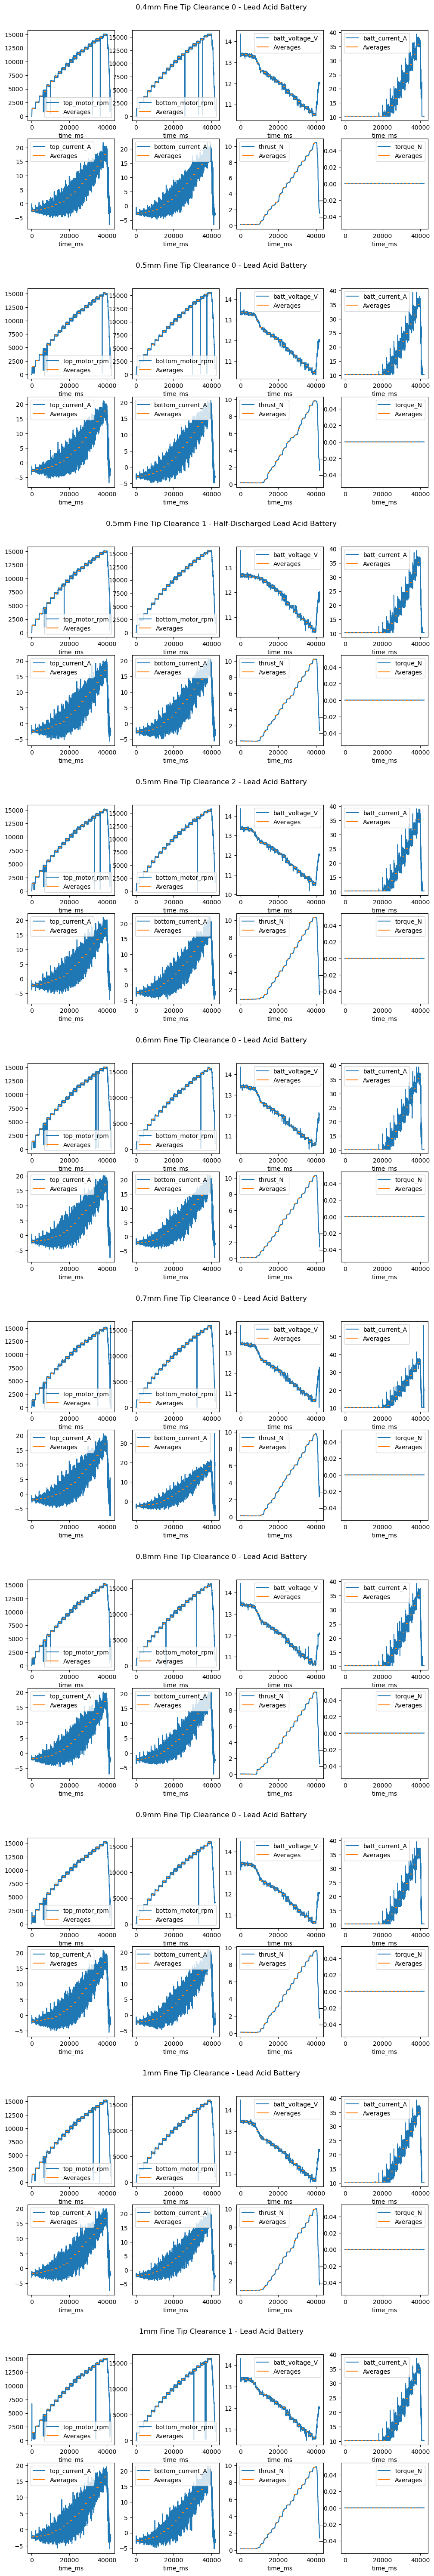

In [11]:
# Debug plots
fig = plt.figure(figsize=(12, 6*len(data_dict)))
subfigs = fig.subfigures(len(data_dict), 1)
if not isinstance(subfigs, np.ndarray):
    subfigs = np.array([subfigs])
for subfig, (n, grp) in zip(subfigs, df_all.groupby("test_name")):
    axs = subfig.subplots(2, 4)
    for ax, col in zip(axs.flat, grp):
        grp.reset_index("test_name").plot(ax=ax, y=col)
        ax.hlines(
            df_steps[col].loc[n]["mean"],
            step_start_times + transient_offset_ms,
            step_start_times + transient_offset_ms + stable_step_duration_ms,
            colors="C1",
            label="Averages",
        )
        ax.legend()
    subfig.suptitle(n)

In [12]:
thrust_mean_g = df_steps["thrust_N"]["mean"] / 9.81 * 1e3
thrust_g_err = df_steps["thrust_N"]["std"] / 9.81 * 1e3

hall_current_mean = df_steps["top_current_A"]["mean"] + df_steps["bottom_current_A"]["mean"]
hall_current_rel_err = (0.02294 * hall_current_mean + 0.3734) / hall_current_mean

batt_voltage_mean = df_steps["batt_voltage_V"]["mean"]
batt_voltage_rel_err = 0.025 / 14.8

shunt_current_mean = df_steps["batt_current_A"]["mean"]
shunt_power_mean = shunt_current_mean * batt_voltage_mean

batt_power_mean = hall_current_mean * batt_voltage_mean
batt_power_rel_err = np.sqrt(hall_current_rel_err**2 + batt_voltage_rel_err**2)

thrust_power_rel_err = np.sqrt((thrust_g_err / thrust_mean_g)**2 + batt_power_rel_err**2)
thrust_mean_g = thrust_mean_g * (thrust_mean_g > 0)

rpm_avg = 0.5*(df_steps["top_motor_rpm"]["mean"] + df_steps["bottom_motor_rpm"]["mean"])

df_thrust_power = pd.DataFrame(
    {
        "rpm_avg": rpm_avg,
        "thrust_mean_g": thrust_mean_g,
        "batt_power_mean": batt_power_mean,
        "shunt_power_mean": shunt_power_mean,
        "thrust_power_g_W": thrust_mean_g / batt_power_mean,
        "shunt_thrust_power_g_W": thrust_mean_g / shunt_power_mean,
        "batt_power_err": np.abs(batt_power_rel_err * batt_power_mean),
        "thrust_g_err": thrust_g_err,
        "thrust_power_err": thrust_power_rel_err * (thrust_mean_g / batt_power_mean)
    }
)

In [13]:
# Set nominal required thrust constants. Used as a benchmark to define region of interest for our data.
hover_thrust_g = 750
payload_thrust_g = 1200

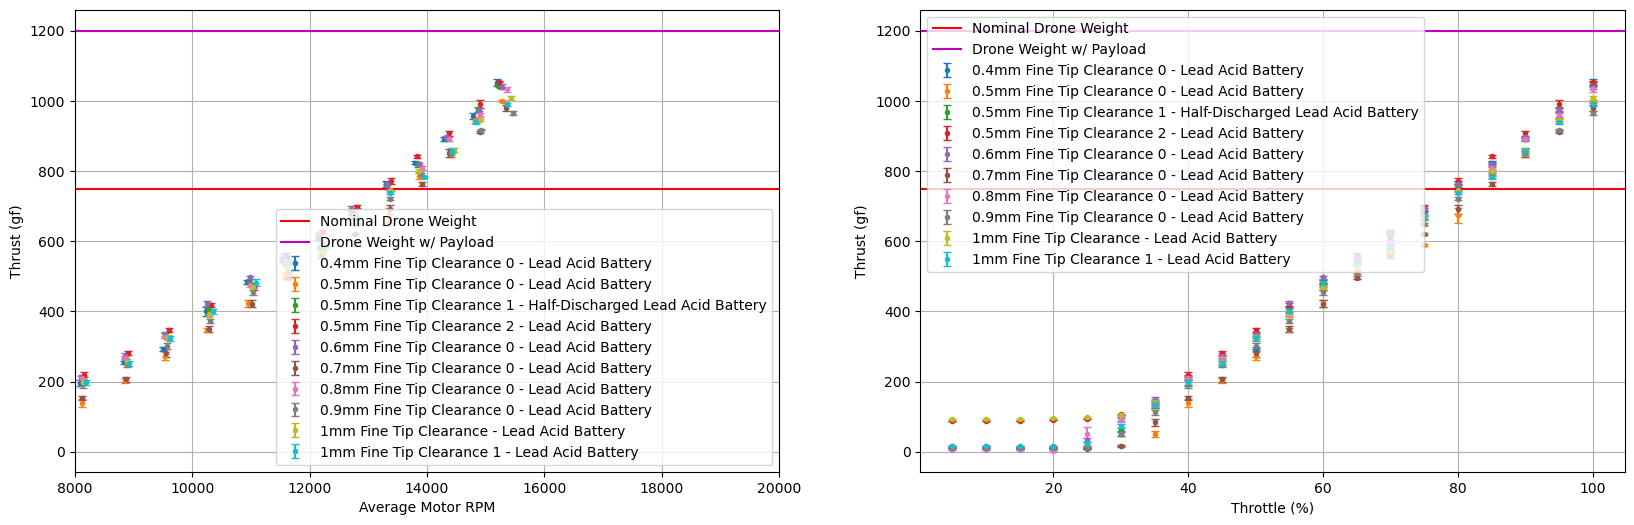

In [15]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    ax[0].errorbar(x="rpm_avg", y="thrust_mean_g", yerr="thrust_g_err", data=grp, label=n, fmt='o', capsize=3, markersize=3)
    ax[1].errorbar(x=grp.index.get_level_values("throttle"), y="thrust_mean_g", yerr="thrust_g_err", data=grp, label=n, fmt='o', capsize=3, markersize=3)

ax[0].set_xlabel("Average Motor RPM")
ax[0].set_ylabel("Thrust (gf)")
ax[0].set_xlim(8000, 20000)
ax[0].axhline(hover_thrust_g, color="r", label="Nominal Drone Weight")
ax[0].axhline(payload_thrust_g, color="m", label="Drone Weight w/ Payload")
ax[0].legend()
ax[0].grid()

ax[1].set_xlabel("Throttle (%)")
ax[1].set_ylabel("Thrust (gf)")
ax[1].axhline(hover_thrust_g, color="r", label="Nominal Drone Weight")
ax[1].axhline(payload_thrust_g, color="m", label="Drone Weight w/ Payload")
ax[1].legend()
ax[1].grid()

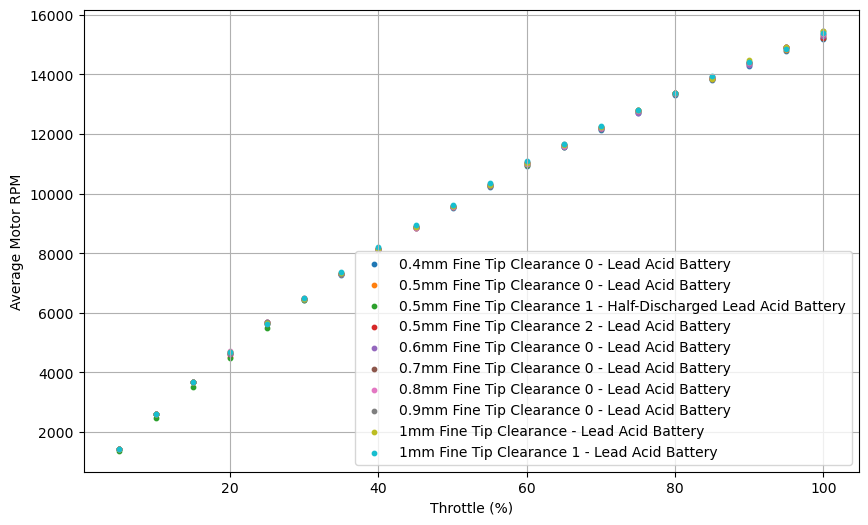

In [16]:
plt.figure(figsize=(10, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x=grp.index.get_level_values("throttle"), y="rpm_avg", data=grp, label=n, s=10)
plt.xlabel("Throttle (%)")
plt.ylabel("Average Motor RPM")
plt.legend()
plt.grid()
plt.show()

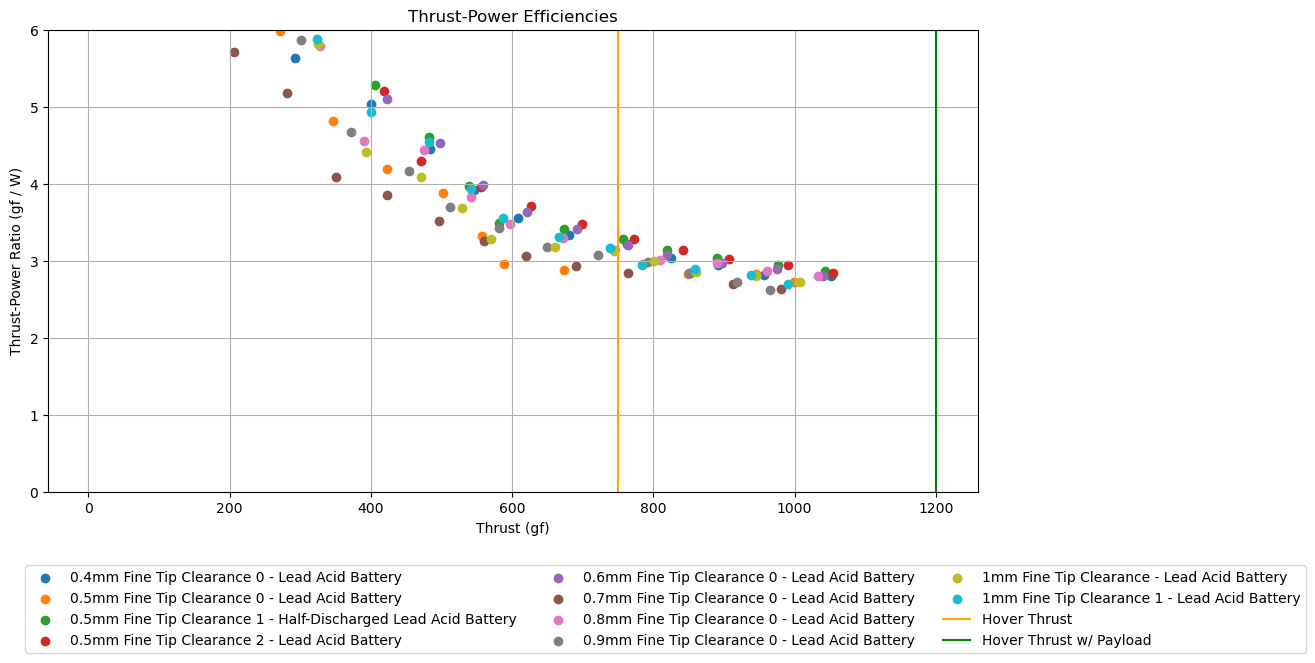

In [17]:
fig = plt.figure(figsize=(12, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x="thrust_mean_g", y="thrust_power_g_W", data=grp, label=n)
plt.xlabel("Thrust (gf)")
plt.ylabel("Thrust-Power Ratio (gf / W)")
# plt.xlim(400, 1750)
plt.ylim(0,6)
plt.axvline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.axvline(payload_thrust_g, color="g", label="Hover Thrust w/ Payload")
plt.grid()
plt.legend(ncols=3, bbox_transform=fig.transFigure, bbox_to_anchor=(0.1, 0), loc="upper left")
plt.title("Thrust-Power Efficiencies")
plt.show()

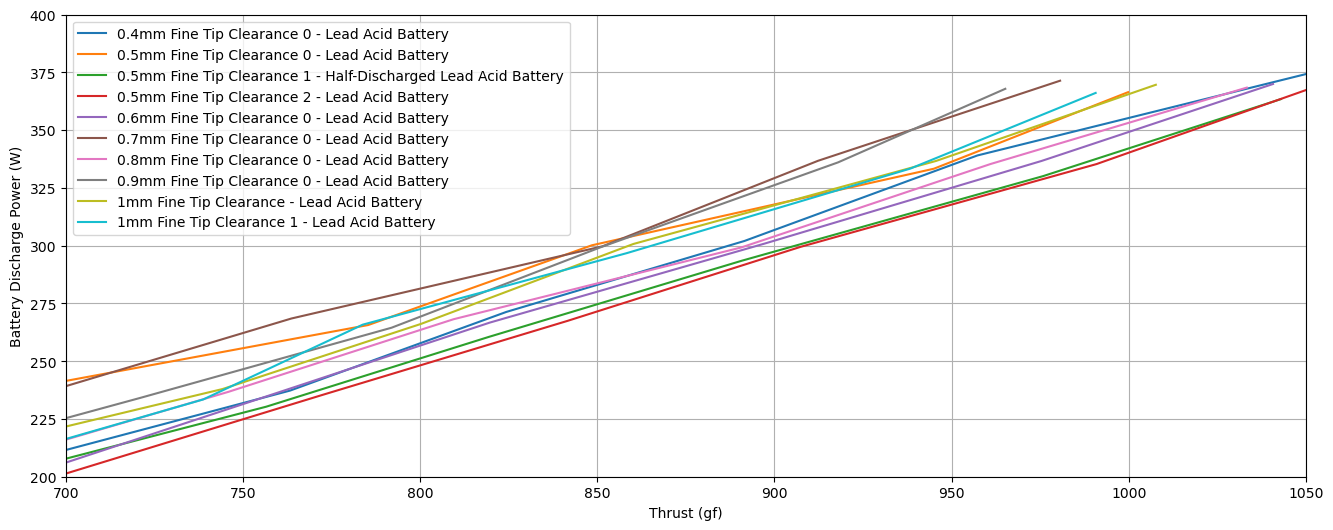

In [31]:
plt.figure(figsize=(16, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    # plt.scatter(x="thrust_mean_g", y="batt_power_mean", data=grp, label=n, s=10)
    plt.plot(grp["thrust_mean_g"], grp["batt_power_mean"], label=n)
    # plt.errorbar(x="rpm_avg", y="batt_power_mean", xerr="thrust_g_err", yerr="batt_power_err", label=n, data=grp, fmt='o', capsize=2, markersize=1)
plt.xlabel("Thrust (gf)")
plt.ylabel("Battery Discharge Power (W)")
plt.xlim(700, 1050)
plt.ylim(200, 400)
plt.grid()
#plt.axvline(hover_thrust_g, color="orange", label="Hover Thrust")
#plt.axvline(payload_thrust_g, color="g", label="Hover Thrust w/ Payload")
plt.legend()
plt.show()

In [ ]:
characteristic_thrust = pd.Index(
    [hover_thrust_g, payload_thrust_g], name="thrust_mean_g"
)
# Interpolate power at hover and payload thrust
df_power_interp = (
    df_thrust_power.reset_index("throttle")
    .set_index("thrust_mean_g", append=True)
    .groupby("test_name")
    .apply(
        lambda g: (gd := g.droplevel("test_name").dropna())[
            ~gd.index.duplicated(keep="first")
        ]
        .reindex(gd.index.append(characteristic_thrust).unique())
        .sort_index()
        .interpolate(method="index", limit_area="inside")
        .loc[characteristic_thrust]
    )
)
df_power_interp

throttle       rpm_avg  \
test_name                     thrust_mean_g                            
test_5in_6blade_0_5mm_fine_pb 750.0          85.301288  13908.904714   
                              1200.0               NaN           NaN   
test_5in_6blade_1000um_0      750.0          53.762078  12604.169189   
                              1200.0         72.483014  15750.713160   
test_5in_6blade_1000um_1      750.0          54.113810  12748.089203   
                              1200.0         73.191222  15872.965462   
test_5in_6blade_1mm_fine      750.0          66.191483  14444.216207   
                              1200.0         90.483758  17591.227324   
test_5in_6blade_1mm_fine_pb   750.0          90.108900  14262.802184   
                              1200.0               NaN           NaN   
test_5in_6blade_1mm_pb_0      750.0          71.537493  12648.217828   
                              1200.0               NaN           NaN   
test_5in_6blade_1mm_pb_1      750.0          71.189301  12624.264499   
                              1200.0               NaN           NaN   

                                             batt_power_mean  \
test_name                     thrust_mean_g                    
test_5in_6blade_0_5mm_fine_pb 750.0               287.436063   
                              1200.0                     NaN   
test_5in_6blade_1000um_0      750.0               169.829458   
                              1200.0              335.068228   
test_5in_6blade_1000um_1      750.0               165.104814   
                              1200.0              342.817005   
test_5in_6blade_1mm_fine      750.0              1111.805371   
                              1200.0             1035.107823   
test_5in_6blade_1mm_fine_pb   750.0               305.156438   
                              1200.0                     NaN   
test_5in_6blade_1mm_pb_0      750.0               182.375862   
                              1200.0                     NaN   
test_5in_6blade_1mm_pb_1      750.0               182.583580   
                              1200.0                     NaN   

                                             shunt_power_mean  \
test_name                     thrust_mean_g                     
test_5in_6blade_0_5mm_fine_pb 750.0                326.534857   
                              1200.0                      NaN   
test_5in_6blade_1000um_0      750.0                233.567394   
                              1200.0               410.825844   
test_5in_6blade_1000um_1      750.0                232.815045   
                              1200.0               413.625631   
test_5in_6blade_1mm_fine      750.0                366.895908   
                              1200.0               651.022070   
test_5in_6blade_1mm_fine_pb   750.0                341.385471   
                              1200.0                      NaN   
test_5in_6blade_1mm_pb_0      750.0                223.174785   
                              1200.0                      NaN   
test_5in_6blade_1mm_pb_1      750.0                221.705792   
                              1200.0                      NaN   

                                             thrust_power_g_W  \
test_name                     thrust_mean_g                     
test_5in_6blade_0_5mm_fine_pb 750.0                  2.609928   
                              1200.0                      NaN   
test_5in_6blade_1000um_0      750.0                  4.432758   
                              1200.0                 3.591465   
test_5in_6blade_1000um_1      750.0                  4.548154   
                              1200.0                 3.507636   
test_5in_6blade_1mm_fine      750.0                  0.674790   
                              1200.0                 1.159420   
test_5in_6blade_1mm_fine_pb   750.0                  2.457850   
                              1200.0                      NaN   
test_5in_6blade_1mm_pb_0      750.0            

In [ ]:
battery_capacity_Wh = 2 * 0.850 * 14.8
flight_time = pd.to_timedelta(
    battery_capacity_Wh / df_power_interp["batt_power_mean"], unit="h"
).rename("flight_time")
flight_time

test_name                      thrust_mean_g
test_5in_6blade_0_5mm_fine_pb  750.0           0 days 00:05:15.117035546
                               1200.0                                NaT
test_5in_6blade_1000um_0       750.0           0 days 00:08:53.335034214
                               1200.0          0 days 00:04:30.321064106
test_5in_6blade_1000um_1       750.0           0 days 00:09:08.596966399
                               1200.0          0 days 00:04:24.210930914
test_5in_6blade_1mm_fine       750.0           0 days 00:01:21.467496352
                               1200.0          0 days 00:01:27.503927572
test_5in_6blade_1mm_fine_pb    750.0           0 days 00:04:56.818250767
                               1200.0                                NaT
test_5in_6blade_1mm_pb_0       750.0           0 days 00:08:16.644672078
                               1200.0                                NaT
test_5in_6blade_1mm_pb_1       750.0           0 days 00:08:16.079658478
      

<Axes: title={'center': 'Flight time with a 4S 1700mAh battery pack'}, xlabel='Thrust (gf)', ylabel='Flight time (minutes)'>

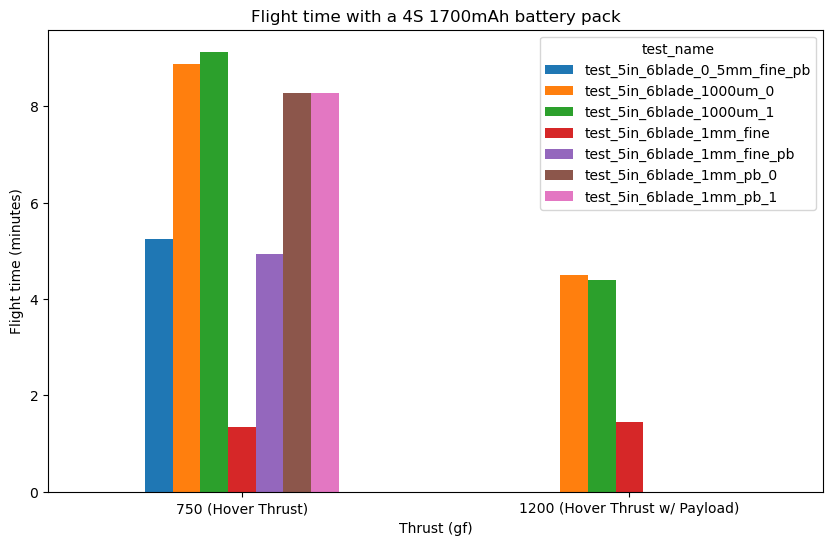

In [ ]:
(
    flight_time.dt.seconds.unstack("test_name").rename(
        index={
            hover_thrust_g: f"{hover_thrust_g} (Hover Thrust)",
            payload_thrust_g: f"{payload_thrust_g} (Hover Thrust w/ Payload)",
        }
    )
    / 60
).plot.bar(
    title="Flight time with a 4S 1700mAh battery pack",
    xlabel="Thrust (gf)",
    ylabel="Flight time (minutes)",
    rot=0,
    figsize=(10, 6)
)